<a href="https://colab.research.google.com/github/AashrithPemmaraju06/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT NAME - BRAIN TUMOR CLASSIFICATION**
## **By - Aashrith Pemmaraju**

#**GITHUB LINK**

https://github.com/AashrithPemmaraju06/Brain-Tumor-Classification

#**PROJECT SUMMARY**

1. Built a deep learning model to classify MRI brain scans into **glioma**, **meningioma**, **pituitary**, or **no tumor**.

2. Preprocessed images by resizing to **224x224** and normalizing pixel values.

3. Applied data augmentation to improve generalization using flips, rotation, and zoom.

4. Developed a **custom CNN** from scratch with convolution, pooling, dropout, and batch normalization layers.

5. Also implemented **transfer learning** using pretrained models (e.g. MobileNetV2).

6. Trained models with **EarlyStopping** and saved the best checkpoints using **ModelCheckpoint**.

7. Evaluated both models using accuracy, precision, recall, F1-score, and confusion matrix.

8. **Custom CNN outperformed** the transfer learning model (62.2% vs 44.7% accuracy).

9. Visualized model performance using training history plots and classification metrics.

10. The project demonstrates how AI can assist in **early, automated diagnosis of brain tumors**.

#**PROBLEM STATEMENT**

The early and accurate classification of brain tumors is critical for effective treatment planning and patient survival. Manual interpretation of brain MRI scans by radiologists can be time-consuming, subject to human error, and inconsistent across institutions. This project aims to develop an AI-powered image classification system that can automatically classify brain MRI images into four categories — **glioma**, **meningioma**, **pituitary tumor**, and **no tumor** — using deep learning techniques. The solution leverages both a **custom-designed Convolutional Neural Network (CNN)** and **transfer learning approaches** to compare model performances. By integrating data preprocessing, augmentation, model training, and evaluation into a unified pipeline, the system aspires to support radiologists in early tumor detection and enable rapid, reliable, and scalable diagnosis in real-time clinical environments.

#**PROJECT BEGINS**

In [ ]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to your actual dataset location and sub folders inside Google Drive
base_path = '/content/drive/MyDrive/Labmentix Projects/Brain Tumor Project/Project Details/brain_tumor_dataset/Tumor'

train_dir = f'{base_path}/train'
val_dir = f'{base_path}/valid'
test_dir = f'{base_path}/test'

##**1.Understanding the Dataset**

In [ ]:
#Checking the number of labels/classes of Tumors in the dataset

import os

classes = sorted(os.listdir(train_dir))
print('The Tumor Classes are:',classes)

The Tumor Classes are: ['glioma', 'meningioma', 'no tumor', 'pituitary']


In [ ]:
#Counting the number of images in each class

class_counts={}

for cls in classes:
  class_path = os.path.join(train_dir,cls)
  num_images = len(os.listdir(class_path))
  class_counts[cls] = num_images

print("Number of images per class:\n")
for cls, count in class_counts.items():
  print(f"{cls} : {count} images")

Number of images per class:

glioma : 564 images
meningioma : 368 images
no tumor : 335 images
pituitary : 438 images


In [ ]:
# Checking the average shape (height,width) for the images in each class

import cv2

img_shape = []

for cls in classes:
  class_path = os.path.join(train_dir,cls)
  img_file = os.listdir(class_path)[:150]

  for img_name in img_file:
    img_path = os.path.join(class_path,img_name)
    img = cv2.imread(img_path)

    if img is not None:
      img_shape.append(img.shape)

height = [shape[0] for shape in img_shape]
width = [shape[1] for shape in img_shape]

print(f"Average Height : {np.mean(height):.2f} pixels")
print(f"Average Width : {np.mean(width):.2f} pixels")

Average Height : 640.00 pixels
Average Width : 640.00 pixels


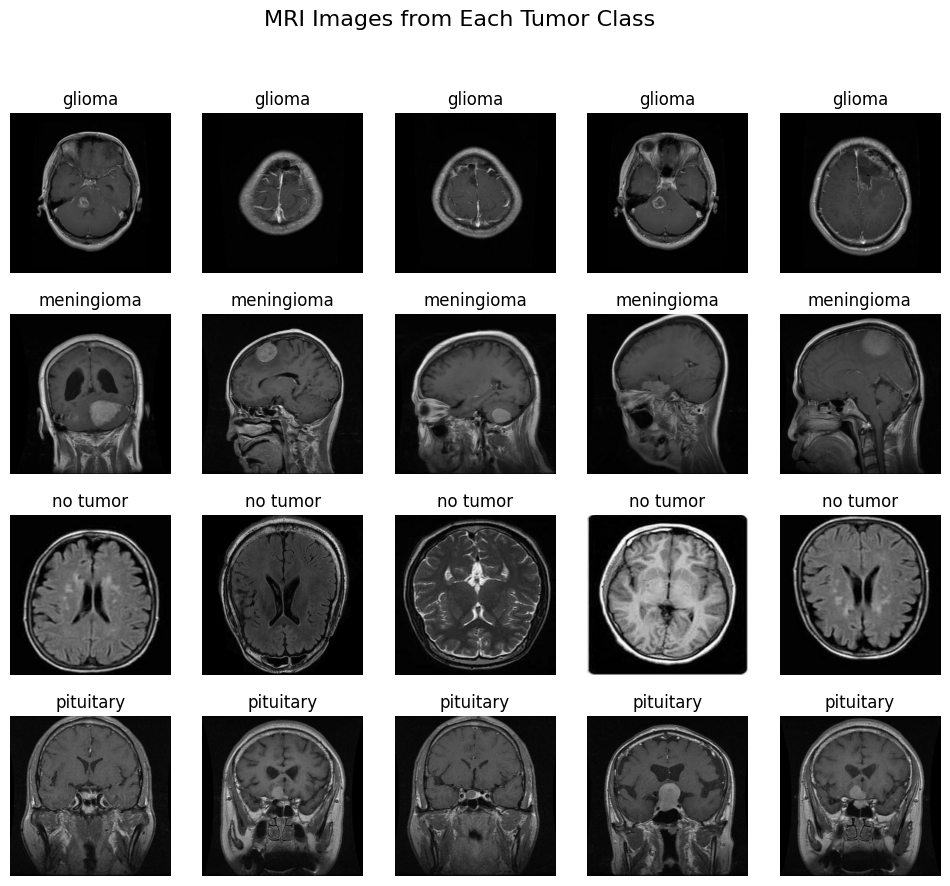

In [ ]:
# Viewing 5 MRI Samples from each Tumor Type

num_images_per_class = 5

plt.figure(figsize=(12,10))
img_index = 1

for cls in classes:
  class_path = os.path.join(train_dir,cls)
  img_file = os.listdir(class_path)[:num_images_per_class]

  for img_name in img_file:
    img_path = os.path.join(class_path,img_name)
    img = cv2.imread(img_path)

    if img is not None:
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

      plt.subplot(len(classes),num_images_per_class,img_index)
      plt.imshow(img)
      plt.title(cls,fontsize=12)
      plt.axis('off')

      img_index+=1

plt.suptitle('MRI Images from Each Tumor Class', fontsize=16)
plt.show()

##**2.Data Preprocessing**

In [ ]:
# Importing more necessary libraries and setting Image Size and Batch Size

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224,224)
batch_size = 32

In [ ]:
# Image Data Generators for Train,Test and Validation Datasets

data_gen = ImageDataGenerator(rescale = 1./255)

train_generator = data_gen.flow_from_directory(
    directory=train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = data_gen.flow_from_directory(
    directory=val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = data_gen.flow_from_directory(
    directory=test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1705 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


##**3.Data Augmentation**

In [ ]:
# Data Augmentation for Training Images

augmented_train_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    height_shift_range = 0.1,
    width_shift_range = 0.1,
    zoom_range = 0.15,
    horizontal_flip = True,
    brightness_range = [0.8,0.12],
    fill_mode = 'nearest'
)

In [ ]:
#Using the Augmented Training Generator

train_generator = augmented_train_gen.flow_from_directory(
    directory = train_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

Found 1705 images belonging to 4 classes.


##**Vizualization**

##**Chart 1**

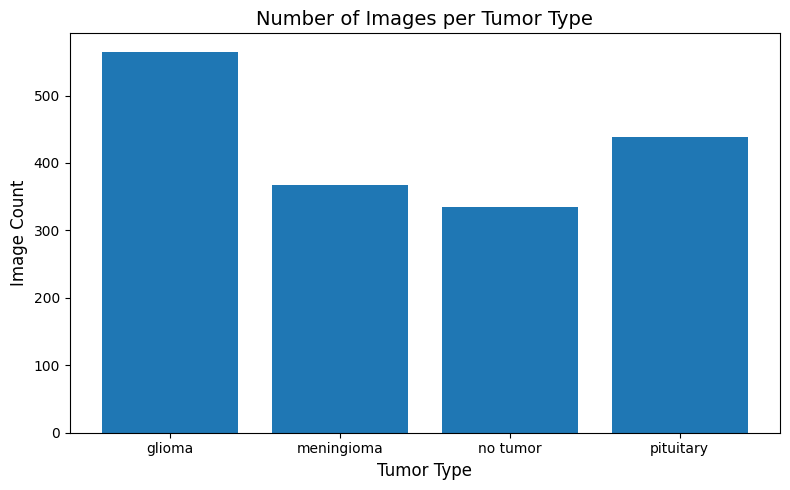

In [ ]:
#Plotting a bar graph to see the number of Images in each type of Tumor Class

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values())

plt.title("Number of Images per Tumor Type", fontsize=14)
plt.xlabel("Tumor Type", fontsize=12)
plt.ylabel("Image Count", fontsize=12)

plt.tight_layout()
plt.show()

###**1. Why did you pick the specific chart?**

The bar chart shows the Number of Image per class (Tumor Type) in the most readable manner.

###**2.What is/are the insight(s) found from the chart?**

* Most Patients are suffering from Glioma Brain Tumor, followed by Pituitary and Meningioma.
* Patients with No Brain Tumor are the least in this dataset

##**5.Custom CNN Model Building**

In [ ]:
# Building Custom CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Heavier dropout to avoid overfitting
model.add(Dense(4, activation='softmax'))

# Compiling the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,372 (42.61 MB)

 Trainable params: 11,169,924 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

##**6.Transfer Learning Model - MobileNetV2**

In [ ]:
# Step 5: Transfer Learning with MobileNetV2 for Brain Tumor Classification

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(4, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=output)

# Compiling the model
transfer_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

transfer_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Recompile with lower learning rate
transfer_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

transfer_model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 2,388,356 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

##**7.Model Training**

In [ ]:
#Training the Custom CNN Model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks_cnn = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_custom_cnn.keras", save_best_only=True, monitor='val_loss')]

history_cnn = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=callbacks_cnn)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 334s 6s/step - accuracy: 0.4884 - loss: 1.1713 - val_accuracy: 0.1972 - val_loss: 10.4669
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 338s 6s/step - accuracy: 0.5081 - loss: 1.1754 - val_accuracy: 0.1932 - val_loss: 8.3798
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 331s 6s/step - accuracy: 0.5037 - loss: 1.1594 - val_accuracy: 0.1912 - val_loss: 8.0515
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 341s 6s/step - accuracy: 0.5314 - loss: 1.1366 - val_accuracy: 0.2251 - val_loss: 7.1237
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 374s 6s/step - accuracy: 0.5305 - loss: 1.1169 - val_accuracy: 0.3964 - val_loss: 5.0472
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 331s 6s/step - accuracy: 0.5175 - loss: 1.1193 - val_accuracy: 0.4303 - val_loss: 4.0472
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 382s 6s/step - accuracy: 0.5229 - loss: 1.0663 - val_accuracy: 0.4841 - val_loss: 3.0223
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 334s 6s/step - accuracy: 0.5144 - loss: 1.1199 - val_accuracy: 0.5398 - 

In [ ]:
#Training the Transfer Learning Model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks_tl = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_transfer_model.keras", save_best_only=True, monitor='val_loss')]

history_tl = transfer_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=callbacks_tl)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 436s 7s/step - accuracy: 0.2838 - loss: 1.8909 - val_accuracy: 0.3327 - val_loss: 1.4070
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 373s 7s/step - accuracy: 0.4313 - loss: 1.3675 - val_accuracy: 0.4582 - val_loss: 1.3001
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 380s 7s/step - accuracy: 0.5519 - loss: 1.0584 - val_accuracy: 0.4462 - val_loss: 1.4174
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 407s 8s/step - accuracy: 0.6316 - loss: 0.9542 - val_accuracy: 0.4382 - val_loss: 1.5106
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 388s 7s/step - accuracy: 0.6938 - loss: 0.7959 - val_accuracy: 0.4522 - val_loss: 1.5154
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 432s 7s/step - accuracy: 0.7061 - loss: 0.7653 - val_accuracy: 0.4622 - val_loss: 1.4990
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 379s 7s/step - accuracy: 0.7367 - loss: 0.6731 - val_accuracy: 0.4761 - val_loss: 1.4493


##**8.Model Evaluation**

In [ ]:
#Evaluating test accuracy and loss for Custom CNN Model

from sklearn.metrics import classification_report

loss_cnn, acc_cnn = model.evaluate(test_generator)
print(f"Custom CNN Model Test Accuracy: {acc_cnn*100:.2f}%")

y_true = test_generator.classes
y_pred_cnn = np.argmax(model.predict(test_generator), axis=1)

class_labels = list(test_generator.class_indices.keys())

print("Custom CNN Model Classification Report:")
print(classification_report(y_true, y_pred_cnn, target_names=class_labels))

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 956ms/step - accuracy: 0.5186 - loss: 1.0732
Custom CNN Model Test Accuracy: 62.20%
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 946ms/step
Custom CNN Model Classification Report:
              precision    recall  f1-score   support

      glioma       0.83      0.49      0.61        80
  meningioma       0.46      0.41      0.43        63
    no_tumor       0.65      0.76      0.70        49
   pituitary       0.60      0.94      0.73        54

    accuracy                           0.62       246
   macro avg       0.63      0.65      0.62       246
weighted avg       0.65      0.62      0.61       246



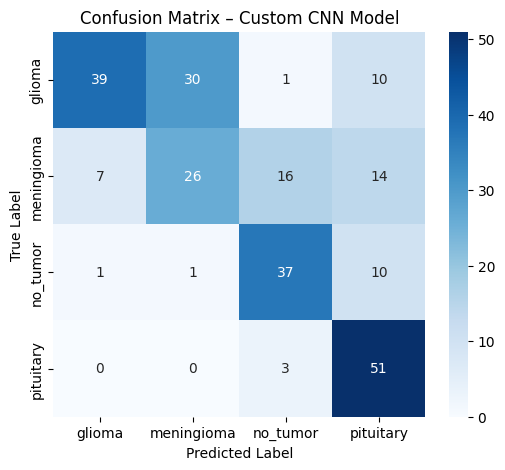

In [ ]:
# Visualizing Confusion Matrix

from sklearn.metrics import confusion_matrix

cm_cnn = confusion_matrix(y_true, y_pred_cnn)

plt.figure(figsize=(6,5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title("Confusion Matrix – Custom CNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

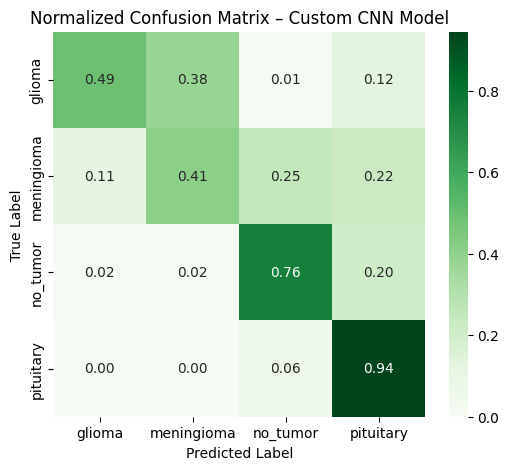

In [ ]:
# Visualizing Normalized Confusion Matrix

cm_cnn_norm = cm_cnn.astype('float') / cm_cnn.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6,5))
sns.heatmap(cm_cnn_norm, annot=True, fmt=".2f", cmap='Greens',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title("Normalized Confusion Matrix – Custom CNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Evaluating test accuracy and loss for Transfer Learning Model

from sklearn.metrics import classification_report

loss_tl, acc_tl = transfer_model.evaluate(test_generator)
print(f"Transfer Learning Model Test Accuracy: {acc_tl*100:.2f}%")

y_true = test_generator.classes
y_pred_tl = np.argmax(transfer_model.predict(test_generator), axis=1)

print("Transfer Learning Model Classification Report:")
print(classification_report(y_true, y_pred_tl, target_names=class_labels))

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6314 - loss: 0.9212
Transfer Learning Model Test Accuracy: 44.72%
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Transfer Learning Model Classification Report:
              precision    recall  f1-score   support

      glioma       0.50      0.86      0.63        80
  meningioma       0.32      0.44      0.37        63
    no_tumor       0.65      0.27      0.38        49
   pituitary       0.00      0.00      0.00        54

    accuracy                           0.45       246
   macro avg       0.37      0.39      0.35       246
weighted avg       0.37      0.45      0.38       246



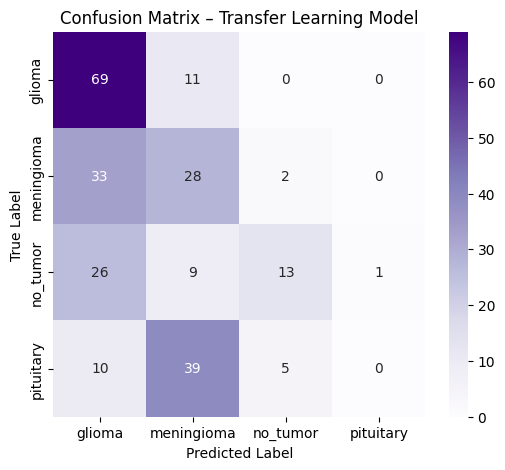

In [ ]:
# Visualizing Confusion Matrix

cm_tl = confusion_matrix(y_true, y_pred_tl)

plt.figure(figsize=(6,5))
sns.heatmap(cm_tl, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title("Confusion Matrix – Transfer Learning Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

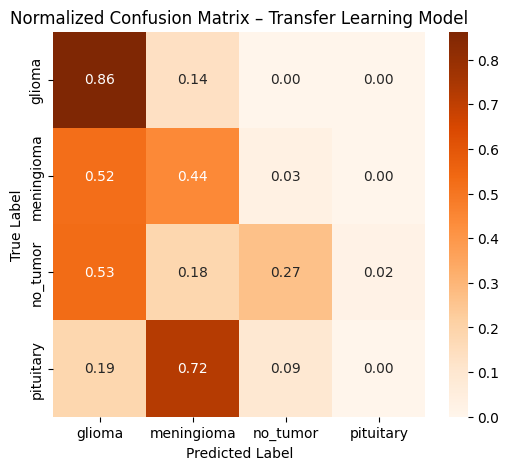

In [ ]:
# Visualizing Normalized Confusion Matrix

cm_tl_norm = cm_tl.astype('float') / cm_tl.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6,5))
sns.heatmap(cm_tl_norm, annot=True, fmt=".2f", cmap='Oranges',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Normalized Confusion Matrix – Transfer Learning Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

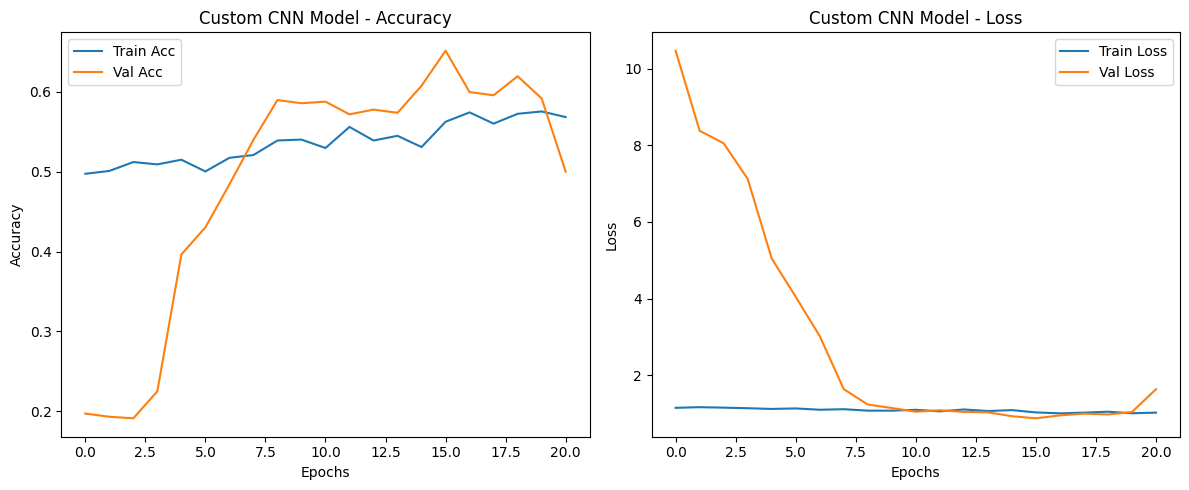

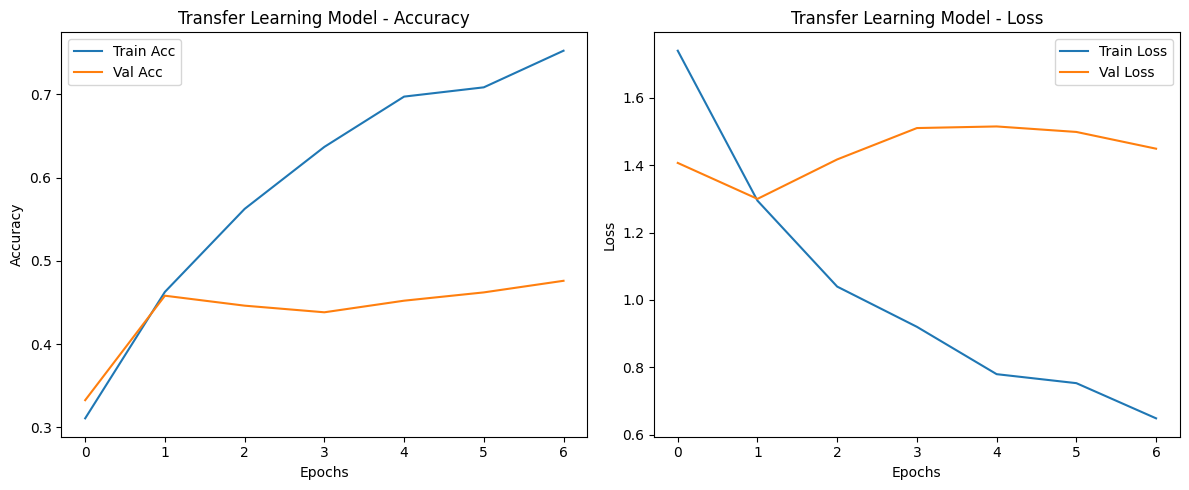

In [ ]:
# Function to plot training and validation accuracy/loss

def plot_history(history, model_name):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for both models
plot_history(history_cnn, "Custom CNN Model")
plot_history(history_tl, "Transfer Learning Model")


##**9.Model Comparision**

In [ ]:
#Creating comparision table between values from Custom CNN Model and Tranfer Learning Model

from sklearn.metrics import precision_score, recall_score, f1_score

# Getting the weighted average metrics
precision_cnn = precision_score(y_true, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_true, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_true, y_pred_cnn, average='weighted')

precision_tl = precision_score(y_true, y_pred_tl, average='weighted')
recall_tl = recall_score(y_true, y_pred_tl, average='weighted')
f1_tl = f1_score(y_true, y_pred_tl, average='weighted')

# Creating the comparison table
comparison_df = pd.DataFrame({
    "Metric": ["Test Accuracy", "Precision", "Recall", "F1-Score"],
    "Custom CNN": [acc_cnn, precision_cnn, recall_cnn, f1_cnn],
    "Transfer Model": [acc_tl, precision_tl, recall_tl, f1_tl]
})

# Converting accuracy to %
comparison_df[["Custom CNN", "Transfer Model"]] = comparison_df[["Custom CNN", "Transfer Model"]].applymap(lambda x: round(x*100, 2))

comparison_df

/tmp/ipython-input-28-2856650110.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  comparison_df[["Custom CNN", "Transfer Model"]] = comparison_df[["Custom CNN", "Transfer Model"]].applymap(lambda x: round(x*100, 2))


,Metric,Custom CNN,Transfer Model
0,Test Accuracy,62.20,44.72
1,Precision,64.77,37.45
2,Recall,62.20,44.72
3,F1-Score,61.08,37.65
